<a href="https://colab.research.google.com/github/hongducp850-maker/TTNT/blob/main/bao_cao_cuoi_ki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thuật toán cắt tỉa alpha beta:


In [1]:
import math

# =============================
# CONFIG
# =============================
MAX_DEPTH = 3   # tăng nếu máy mạnh

# =============================
# IN BÀN CỜ
# =============================
def print_board(board, N):
    for i in range(N):
        row = board[i*N:(i+1)*N]
        print(" | ".join(str(x).center(3) for x in row))
        if i < N - 1:
            print("-" * (N * 6 - 3))
    print()


# =============================
# Ô CÒN TRỐNG
# =============================
def available_moves(board):
    return [i for i in range(len(board)) if board[i] not in ["X", "O"]]

# =============================
# KIỂM TRA THẮNG
# =============================
def check_winner(board, N):
    lines = []

    for r in range(N):
        lines.append(board[r*N:(r+1)*N])

    for c in range(N):
        lines.append([board[r*N + c] for r in range(N)])

    lines.append([board[i*N + i] for i in range(N)])
    lines.append([board[i*N + (N-1-i)] for i in range(N)])

    for line in lines:
        if line.count("X") == N:
            return "X"
        if line.count("O") == N:
            return "O"
    return None

# =============================
# ĐÁNH GIÁ
# =============================
def evaluate(board, N, AI, HUMAN):
    winner = check_winner(board, N)
    if winner == AI:
        return 100
    if winner == HUMAN:
        return -100
    return 0

# =============================
# MINIMAX + ALPHA-BETA
# =============================
def minimax(board, N, depth, alpha, beta, maximizing, AI, HUMAN):
    score = evaluate(board, N, AI, HUMAN)

    if abs(score) == 100 or depth == MAX_DEPTH or not available_moves(board):
        return score

    if maximizing:
        best = -math.inf
        for move in available_moves(board):
            board[move] = AI
            val = minimax(board, N, depth+1, alpha, beta, False, AI, HUMAN)
            board[move] = move
            best = max(best, val)
            alpha = max(alpha, best)
            if beta <= alpha:
                break
        return best
    else:
        best = math.inf
        for move in available_moves(board):
            board[move] = HUMAN
            val = minimax(board, N, depth+1, alpha, beta, True, AI, HUMAN)
            board[move] = move
            best = min(best, val)
            beta = min(beta, best)
            if beta <= alpha:
                break
        return best

# =============================
# TÌM NƯỚC ĐI TỐT NHẤT
# =============================
def best_move(board, N, AI, HUMAN):
    best_val = -math.inf
    move_choice = None

    for move in available_moves(board):
        board[move] = AI
        move_val = minimax(board, N, 0, -math.inf, math.inf, False, AI, HUMAN)
        board[move] = move

        if move_val > best_val:
            best_val = move_val
            move_choice = move

    return move_choice

# =============================
# MAIN
# =============================
def main():
    N = int(input("Nhập kích thước bàn cờ N: "))

    player = input("Bạn chọn X hay O? ").strip().upper()
    while player not in ["X", "O"]:
        player = input("Chỉ được chọn X hoặc O: ").strip().upper()

    AI = "O" if player == "X" else "X"

    board = [i for i in range(N*N)]
    turn = "X"   # X luôn đi trước

    while True:
        print_board(board, N)

        if turn == player:
            move = int(input("Bạn chọn ô: "))
            if move in available_moves(board):
                board[move] = player
                turn = AI
        else:
            print("AI đang suy nghĩ...")
            move = best_move(board, N, AI, player)
            board[move] = AI
            turn = player

        winner = check_winner(board, N)
        if winner:
            print_board(board, N)
            print("NGƯỜI THẮNG:", winner)
            break

        if not available_moves(board):
            print("HÒA!")
            break

if __name__ == "__main__":
    main()


Nhập kích thước bàn cờ N: 5
Bạn chọn X hay O? O
 0  |  1  |  2  |  3  |  4 
---------------------------
 5  |  6  |  7  |  8  |  9 
---------------------------
 10 |  11 |  12 |  13 |  14
---------------------------
 15 |  16 |  17 |  18 |  19
---------------------------
 20 |  21 |  22 |  23 |  24

AI đang suy nghĩ...
 X  |  1  |  2  |  3  |  4 
---------------------------
 5  |  6  |  7  |  8  |  9 
---------------------------
 10 |  11 |  12 |  13 |  14
---------------------------
 15 |  16 |  17 |  18 |  19
---------------------------
 20 |  21 |  22 |  23 |  24



KeyboardInterrupt: Interrupted by user

Thuật toán tô màu đồ thị

In [ ]:
# SINH MA TRẬN KỀ NGẪU NHIÊN
import random

def generate_graph(n, p=0.4):
    G = [[0]*n for _ in range(n)]
    for i in range(n):
        for j in range(i+1, n):
            if random.random() < p:
                G[i][j] = G[j][i] = 1
    return G
# KHỞI TẠO ĐỒ THỊ
n = int(input("Nhập số đỉnh: "))
nodes = [chr(65+i) for i in range(n)]  # A, B, C,...

G = generate_graph(n)
# IN RA MA TRẬN KỀ
print("\nMa trận kề:")
for row in G:
    print(row)
# TÔ MÀU ĐỒ THỊ
t_ = {nodes[i]: i for i in range(n)}
degree = [sum(G[i]) for i in range(n)]

k = int(input("\nNhập số màu k: "))
colors = input("Nhập danh sách màu: ").split()[:k]

start_node = input("Nhập đỉnh bắt đầu: ").upper()
# SẮP XẾP THEO WELSH–POWELL + ƯU TIÊN ĐỈNH BẮT ĐẦU
sortedNode = sorted(nodes, key=lambda x: degree[t_[x]], reverse=True)
if start_node in sortedNode:
    sortedNode.remove(start_node)
    sortedNode.insert(0, start_node)
# TÔ MÀU GREEDY
solution = {}

for v in sortedNode:
    used = set()
    for j in range(n):
        if G[t_[v]][j] == 1 and nodes[j] in solution:
            used.add(solution[nodes[j]])

    for c in colors:
        if c not in used:
            solution[v] = c
            break
# IN RA KẾT QUẢ
print("\nKết quả tô màu:")
for v in sortedNode:
    neighbors = [nodes[i] for i in range(n) if G[t_[v]][i] == 1]
    print(f"Đỉnh {v} (kề {neighbors}) → {solution[v]}")


Nhập số đỉnh: 7

Ma trận kề:
[0, 1, 1, 0, 1, 1, 0]
[1, 0, 0, 1, 1, 0, 0]
[1, 0, 0, 1, 1, 0, 1]
[0, 1, 1, 0, 0, 0, 1]
[1, 1, 1, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 1, 0, 0, 0]

Nhập số màu k: 8
Nhập danh sách màu: đỏ vàng xanh lục lam chàm tím hồng
Nhập đỉnh bắt đầu: F

Kết quả tô màu:
Đỉnh F (kề ['A', 'E']) → đỏ
Đỉnh A (kề ['B', 'C', 'E', 'F']) → vàng
Đỉnh C (kề ['A', 'D', 'E', 'G']) → đỏ
Đỉnh E (kề ['A', 'B', 'C', 'F']) → xanh
Đỉnh B (kề ['A', 'D', 'E']) → đỏ
Đỉnh D (kề ['B', 'C', 'G']) → vàng
Đỉnh G (kề ['C', 'D']) → xanh


Thuật toán Kmeans

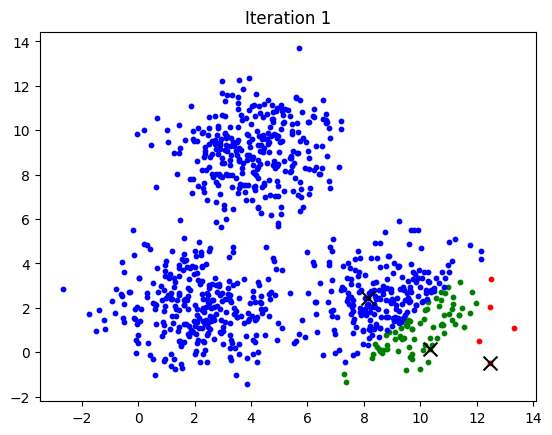

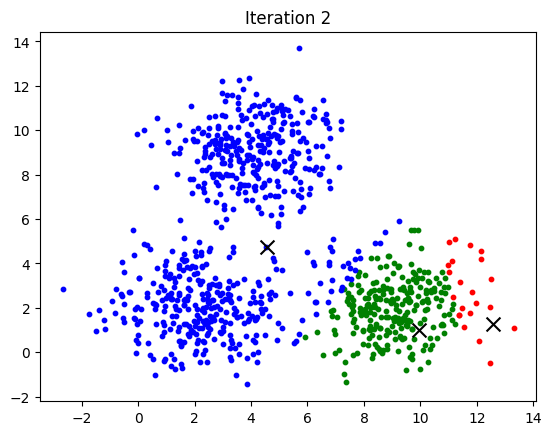

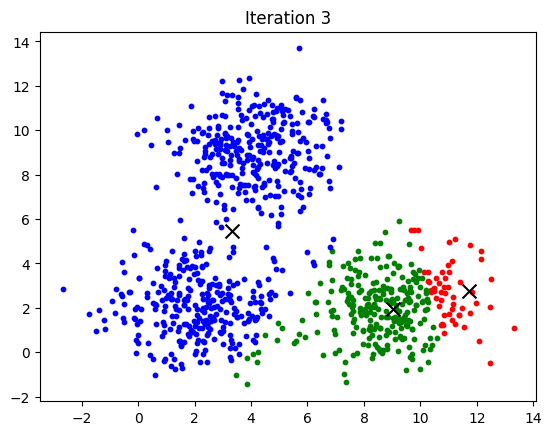

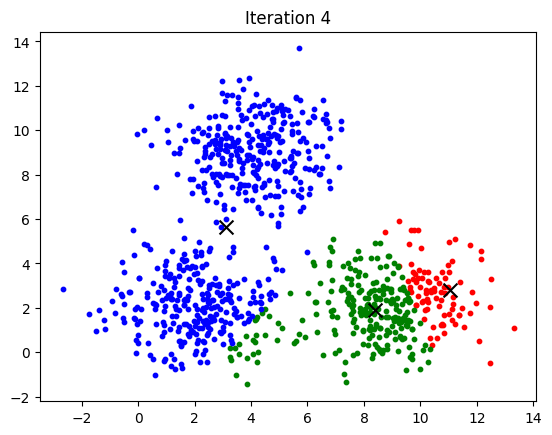

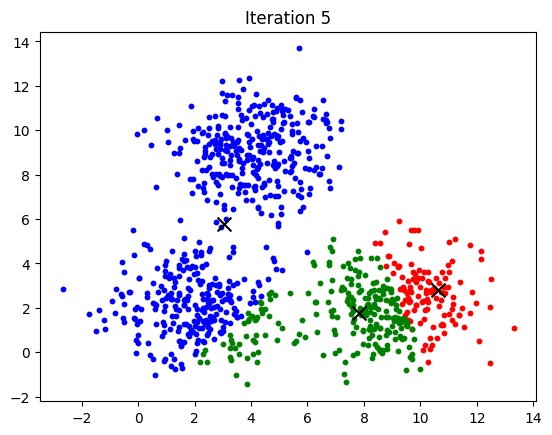

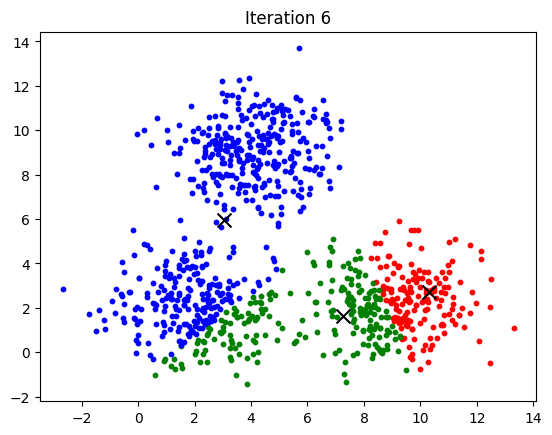

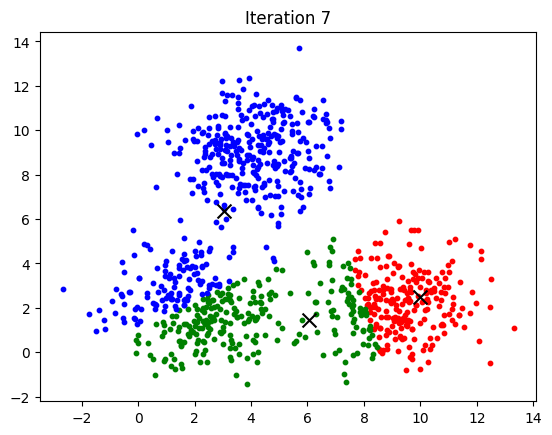

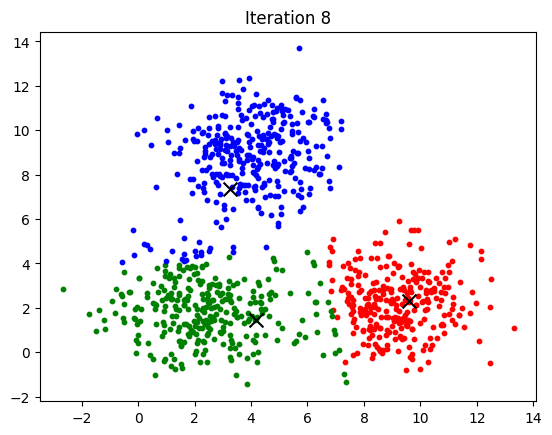

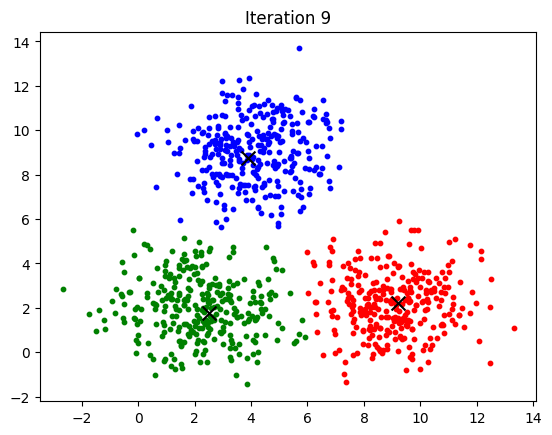

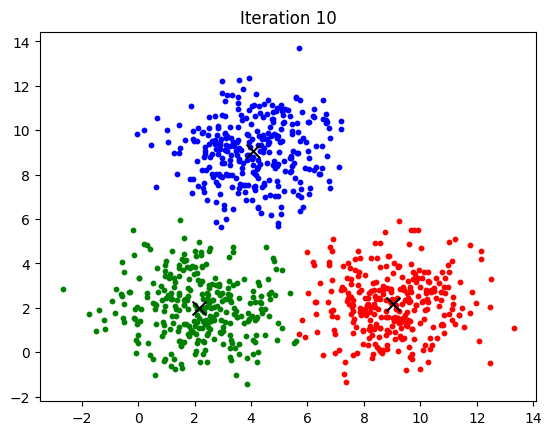

Tâm cụm cuối:
 [[8.99937245 2.18383178]
 [2.1318966  2.02377648]
 [4.07735836 9.07109839]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# =============================
# TẠO DỮ LIỆU GIẢ LẬP
# =============================
means = [[2,2], [9,2], [4,9]]
cov = [[2,0],[0,2]]
n = 300

X0 = np.random.multivariate_normal(means[0], cov, n)
X1 = np.random.multivariate_normal(means[1], cov, n)
X2 = np.random.multivariate_normal(means[2], cov, n)
# GỘP DỮ LIỆU THÀNH 1 TẬP DUY NHẤT ĐỂ PHÂN CỤM
X = np.vstack((X0, X1, X2))

# =============================
# HÀM KMEANS
# KHỞI TẠO TÂM CỤM
def init_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]
# GÁN NHÃN CHO DỮ LIỆU
def predict_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis=1)
# CẬP NHẬT TÂM CỤM
def update_centers(X, labels, k):
    centers = np.zeros((k, X.shape[1]))
    for i in range(k):
        Xi = X[labels == i]
        if len(Xi) == 0:
            centers[i] = X[np.random.randint(0, X.shape[0])]
        else:
            centers[i] = np.mean(Xi, axis=0)
    return centers
# KIỂM TRA HỘI TỤ
def has_converged(old, new, eps=1e-4):
    return np.linalg.norm(old - new) < eps
# VẼ ĐỒ THỊ
def visualize(X, centers, labels, k, title):
    colors = ['r','g','b','c','m','y']
    plt.figure()
    plt.title(title)
    for i in range(k):
        Xi = X[labels == i]
        plt.scatter(Xi[:,0], Xi[:,1], s=10, color=colors[i])
        plt.scatter(centers[i][0], centers[i][1], color='black', marker='x', s=100)
    plt.show()
# HÀM KMEANS
def kmeans(X, k, max_iter=10):
    centers = init_centers(X, k)

    for i in range(max_iter):
        labels = predict_labels(X, centers)
        visualize(X, centers, labels, k, f"Iteration {i+1}")
        new_centers = update_centers(X, labels, k)

        if has_converged(centers, new_centers):
            print("Hội tụ sau", i+1, "vòng")
            break
        centers = new_centers

    return centers, labels

# =============================
# CHẠY KMEANS
# =============================
centers, labels = kmeans(X, k=3)
print("Tâm cụm cuối:\n", centers)
